# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [2]:
import csv
import urllib

#URL address that contains cso status with location name. This includes king county and SPU's data
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data.CSV"
# webpage = urllib.urlopen(url)
# datareader = csv.reader(webpage)

import urllib.request as ur
# s = ur.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
# sl = s.read()
# print(sl)
colnames = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name']
cars_df = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",names= colnames) 
cars_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


In [3]:
cars_df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
cars_df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt          float64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [5]:
cars_df.shape

(398, 9)

In [6]:
cars_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
# It is observed that the spread of the weight of the car from the mean seems to be high.
# This is probably because a wide variety of cars may have been considered

# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [8]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null float64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
cars_df = cars_df.replace('?', np.nan) # Upon eye balling, the hp column has some question marks which needs to be imputed
cars_df['hp'] = cars_df['hp'].astype('float64')

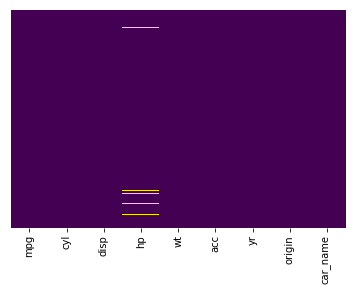

In [10]:
sns.heatmap(cars_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
#Replcaing the '?' value by median of the hp column
cars_df["hp"] = cars_df["hp"].replace(np.NaN,cars_df.iloc[:,3].median())
# cars_df['hp'] = cars_df["hp"].fillna(cars_df["hp"].median())
cars_df['hp']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
5      198.0
6      220.0
7      215.0
8      225.0
9      190.0
10     170.0
11     160.0
12     150.0
13     225.0
14      95.0
15      95.0
16      97.0
17      85.0
18      88.0
19      46.0
20      87.0
21      90.0
22      95.0
23     113.0
24      90.0
25     215.0
26     200.0
27     210.0
28     193.0
29      88.0
       ...  
368     88.0
369     88.0
370     85.0
371     84.0
372     90.0
373     92.0
374     93.5
375     74.0
376     68.0
377     68.0
378     63.0
379     70.0
380     88.0
381     75.0
382     70.0
383     67.0
384     67.0
385     67.0
386    110.0
387     85.0
388     92.0
389    112.0
390     96.0
391     84.0
392     90.0
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: hp, Length: 398, dtype: float64

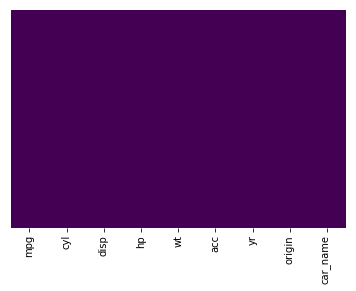

In [12]:
sns.heatmap(cars_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [13]:
cars_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


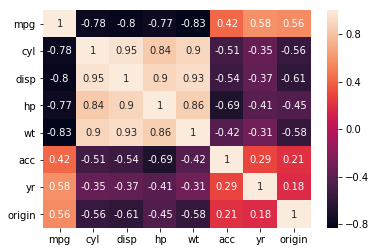

In [14]:
sns.heatmap(cars_df.corr(), annot = True)

<Figure size 1008x1008 with 0 Axes>

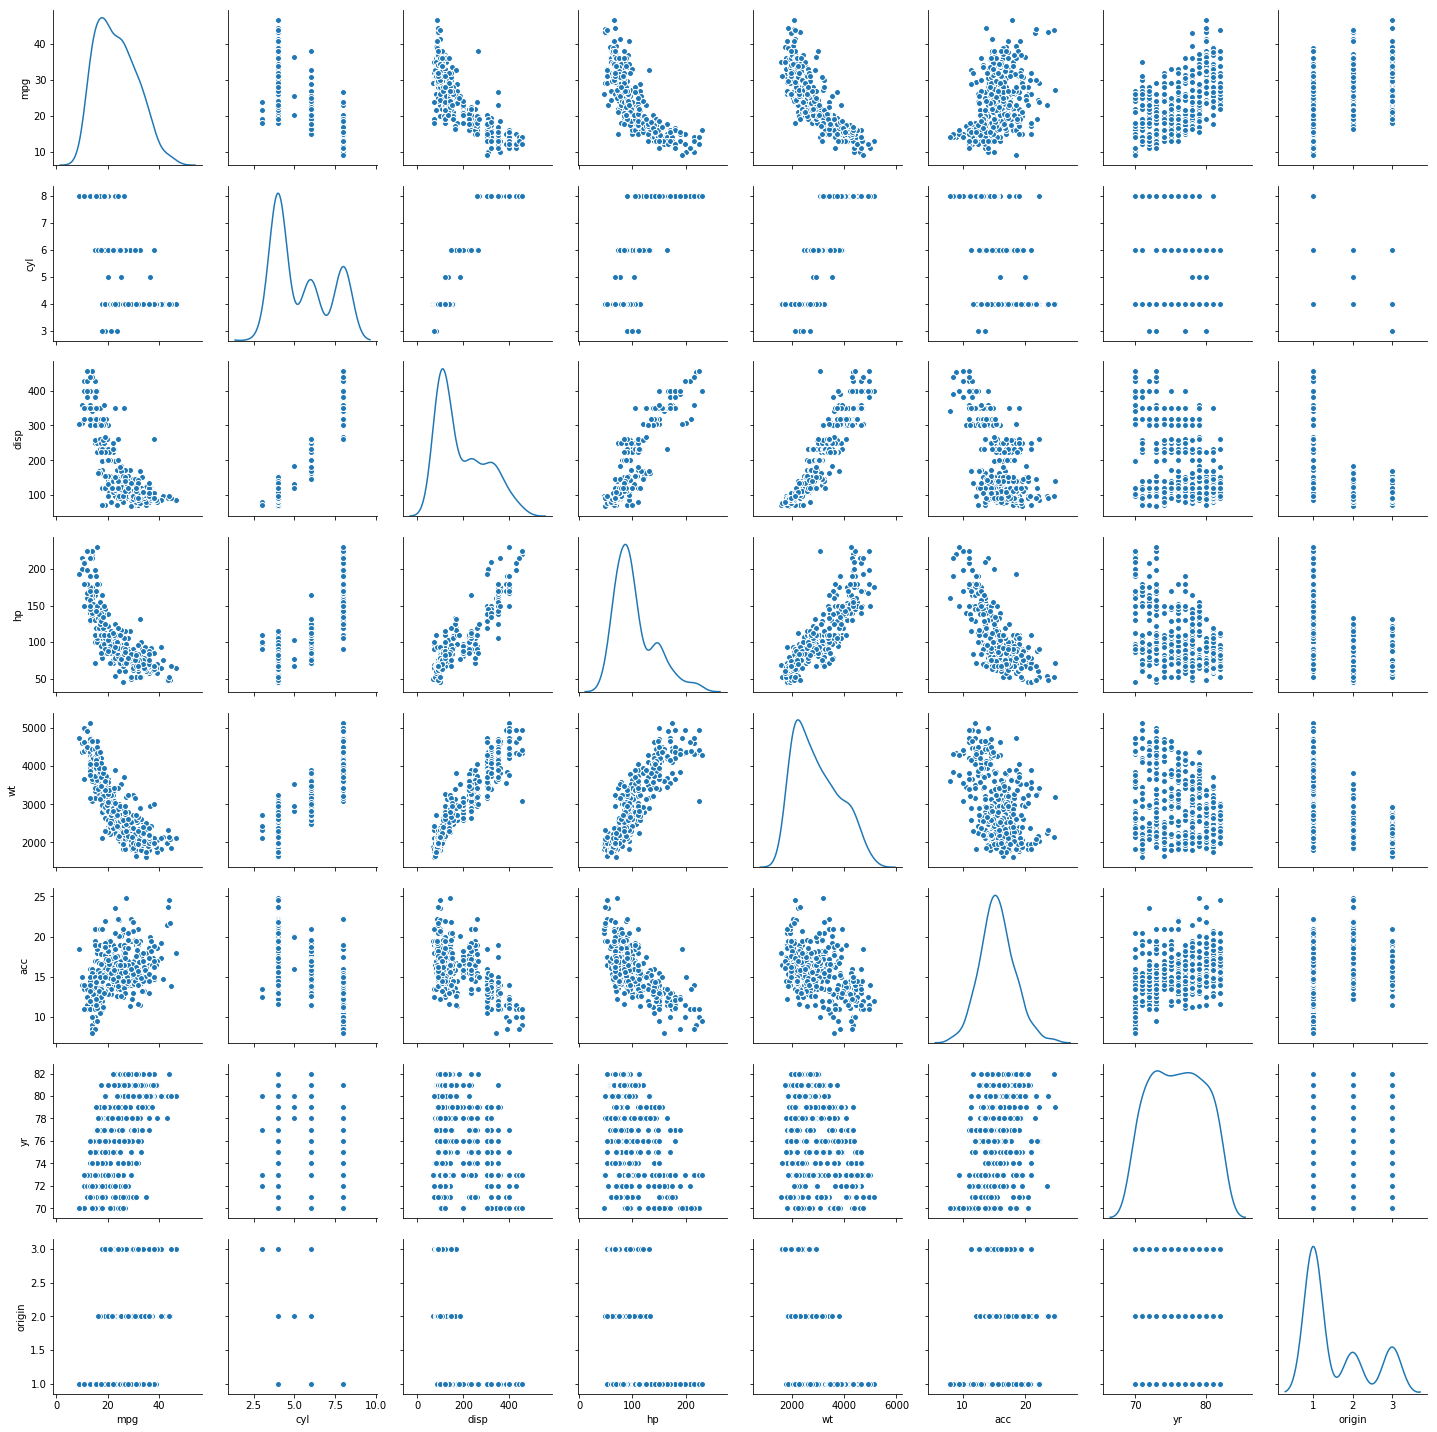

In [15]:
plt.figure(figsize=(14, 14))
sns.pairplot(cars_df, diag_kind='kde');

In [16]:
#Observations
# The cylinder and origin variables has a multitmodal distribution suggesting the type of variation in the data it holds
# Accelaration variable follows almost a near normal distribution
# The mileage follows a negative correlation against dispersion, horsepower and weight i.e. if the mileage is more, 
# the rest three variables will be less and vice-versa
# The horsepower and wieght seems to have a positive correlation

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [21]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age

Year = 118 # The year value is assigned 118 instead of 2018 as the year values in the data set are 2 digits.
cars_df['Car_Age']=Year-cars_df.iloc[:,6]
cars_df_with_dummies = pd.get_dummies(cars_df['origin'])
cars_df_with_dummies

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [22]:
cars_df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,Car_Age
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu""",48
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320""",48
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite""",48
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst""",48
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino""",48
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500""",48
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala""",48
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii""",48
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina""",48
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl""",48


In [23]:
#Removing irrelevant columns
cars_df= cars_df.drop('origin', axis=1)

cars_df = cars_df.drop('yr', axis=1)

cars_df = cars_df.drop('car_name', axis=1)
cars_df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'Car_Age'], dtype='object')

# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

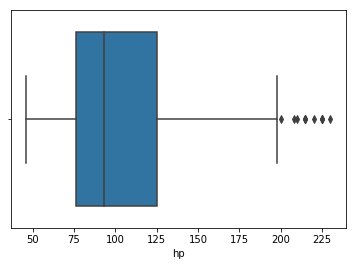

In [32]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now
new_cars_df  = cars_df.copy(deep = True)# Creating a new data frame
new_cars_df
import seaborn as sns
sns.boxplot(x=new_cars_df['hp'])
# Although we observe hp values moe than 200, it does not necessarily mean they are outlier in this context.

In [33]:
new_cars_df

,mpg,cyl,disp,hp,wt,acc,Car_Age
0,18.0,8,307.0,130.0,3504.0,12.0,48
1,15.0,8,350.0,165.0,3693.0,11.5,48
2,18.0,8,318.0,150.0,3436.0,11.0,48
3,16.0,8,304.0,150.0,3433.0,12.0,48
4,17.0,8,302.0,140.0,3449.0,10.5,48
5,15.0,8,429.0,198.0,4341.0,10.0,48
6,14.0,8,454.0,220.0,4354.0,9.0,48
7,14.0,8,440.0,215.0,4312.0,8.5,48
8,14.0,8,455.0,225.0,4425.0,10.0,48
9,15.0,8,390.0,190.0,3850.0,8.5,48


In [34]:
from scipy.stats import zscore

new_cars_df_z = new_cars_df.apply(zscore)

# Q7. Create appropriate clusters with the new data set

In [35]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(new_cars_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,2786.000000
1,2,1294.841895
2,3,946.019791
3,4,738.374388
4,5,665.245994
5,6,594.925548
6,7,541.772200
7,8,497.211803
8,9,472.315260


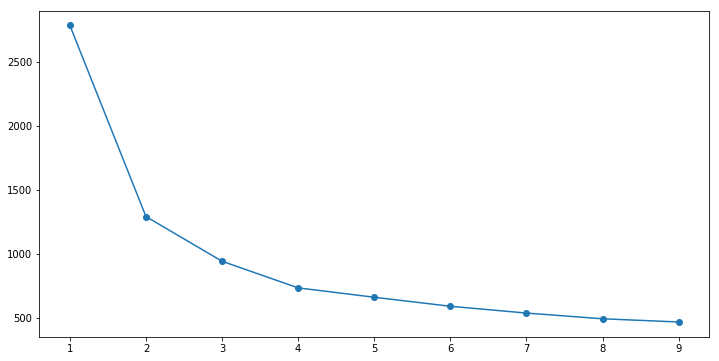

In [36]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Q8. Identify the appropriate clusters with result from above question

In [38]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(new_cars_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

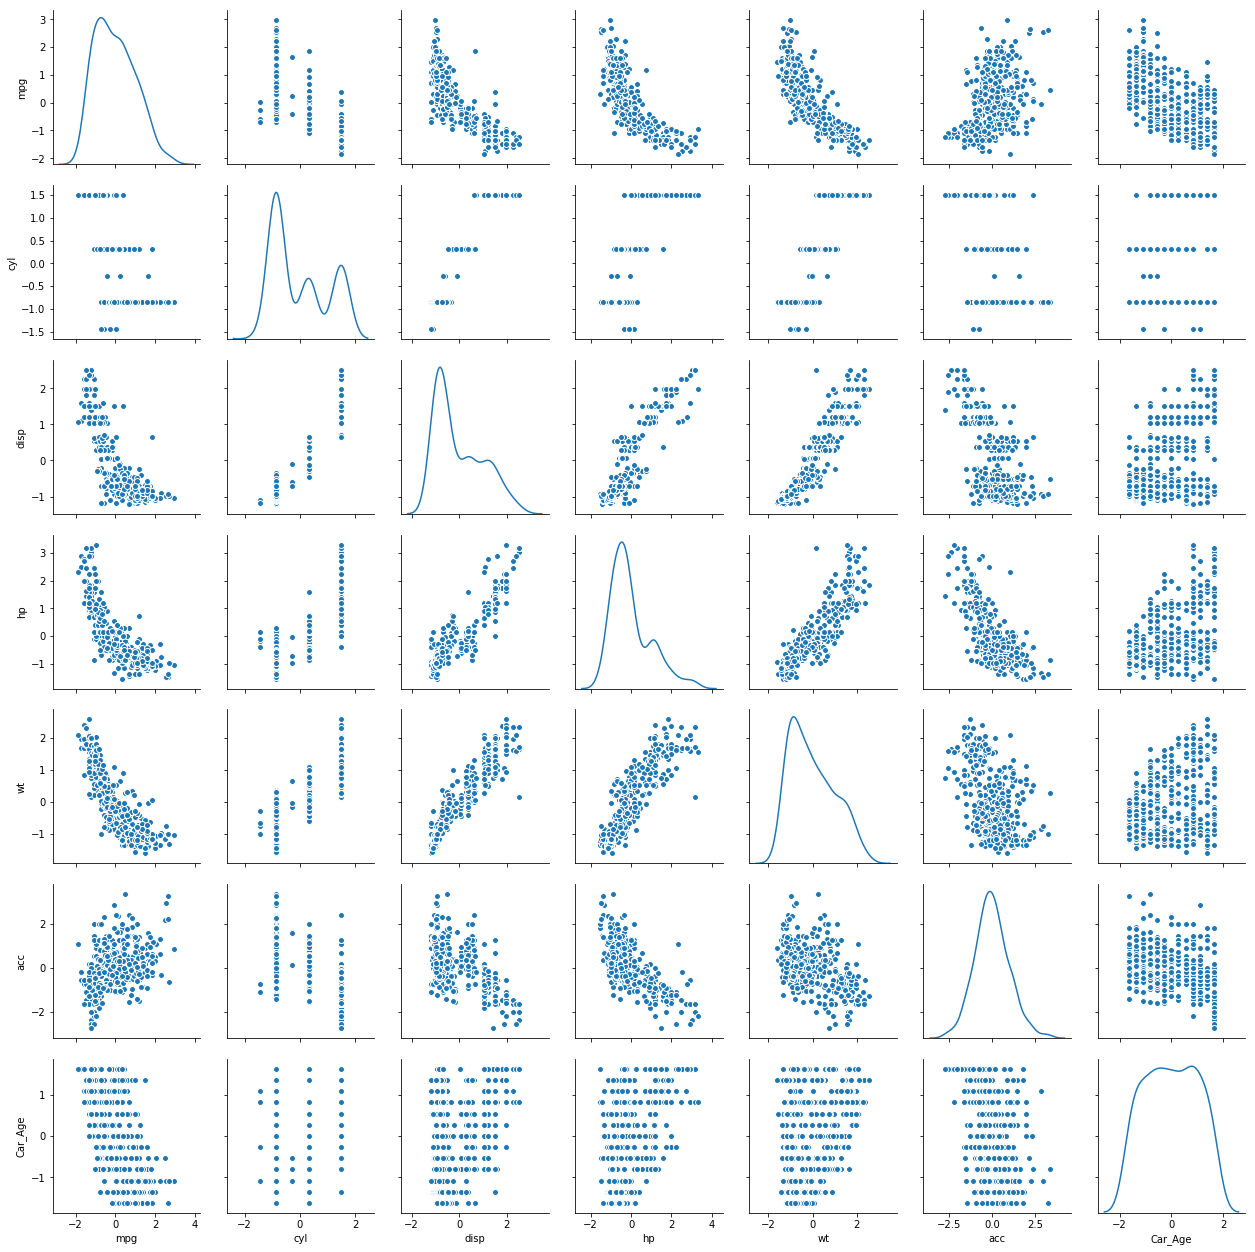

In [39]:
sns.pairplot(new_cars_df_z, diag_kind='kde')  

# Q9. Check for no of values in each cluster and centers for each variables. 

In [40]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.75394661, -0.85347696, -0.80321374, -0.67506194, -0.78549879,
         0.36133415, -0.30992304],
       [-1.15871315,  1.49819126,  1.50068407,  1.51412926,  1.40001604,
        -1.07612225,  0.6725559 ],
       [-0.47905415,  0.35772459,  0.24687769, -0.04275477,  0.30829922,
         0.28578589,  0.00272145]])

In [42]:
centroid_df = pd.DataFrame(centroids, columns = list(new_cars_df_z) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,Car_Age
0,0.753947,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,-0.309923
1,-1.158713,1.498191,1.500684,1.514129,1.400016,-1.076122,0.672556
2,-0.479054,0.357725,0.246878,-0.042755,0.308299,0.285786,0.002721


# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [45]:
prediction=cluster.predict(new_cars_df_z)
new_cars_df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [46]:
new_cars_df_z.groupby("GROUP").count()

,mpg,cyl,disp,hp,wt,acc,Car_Age
GROUP,,,,,,,
0,207,207,207,207,207,207,207
1,95,95,95,95,95,95,95
2,96,96,96,96,96,96,96


In [ ]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cars_df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups